# Gaussian Process

Consider the standard model:
    $$ y = f(x) + \epsilon$$
    $$ f(x) = x^Tw $$
    
Where $x$ is the input vector, $w$ is a vector of weights and $\epsilon$ is the gaussian noise.

$$\varepsilon \sim \mathcal { N } \left( 0 , \sigma _ { n } ^ { 2 } \right)$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.gaussian_process

In [4]:
rbf_kernal = sklearn.gaussian_process.kernels.RBF()

In [14]:
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

In [17]:
# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = rbf_kernal(X, X)

In [18]:
# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 5)

In [20]:
samples.shape

(5, 50)

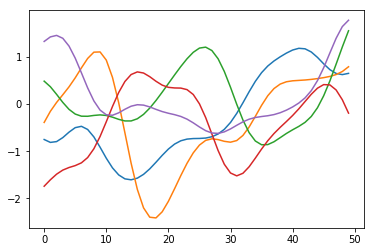

In [30]:
for i in range(0, 5):
    plt.plot(samples[i])


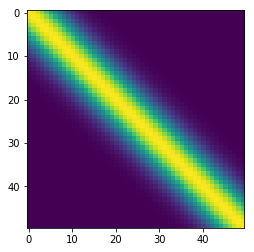

In [26]:
plt.imshow(cov)

In [55]:
X = X.ravel()
mu = mu.ravel()
up = mu + 1.96 * np.sqrt(np.diag(cov))
dwn = mu - 1.96 * np.sqrt(np.diag(cov))

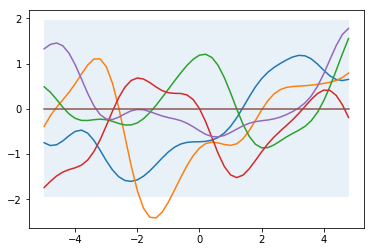

In [67]:
for i in range(0, 5):
    plt.plot(X, samples[i])
plt.fill_between(X, up, dwn, alpha=0.1)
plt.plot(X, mu)

In [49]:
X.shape

(50, 1)

In [68]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

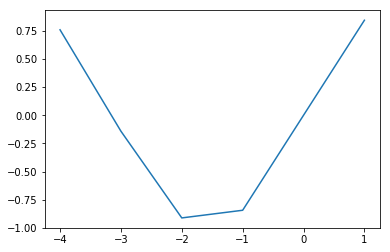

In [69]:
plt.plot(X_train, Y_train)

In [70]:
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

In [72]:
K = rbf_kernal(X, X)

In [73]:
K_s = rbf_kernal(X, X_train)
K_ss = rbf_kernal(X_train, X_train)

In [74]:
mu_s = X_train.mean() + K_s.T @ np.linalg.inv(K) @ Y_train

ValueError: shapes (5,50) and (5,1) not aligned: 50 (dim 1) != 5 (dim 0)

In [81]:
K_s.T.dot(np.linalg.inv(K)).shape

(5, 50)

In [76]:
K.shape

(50, 50)

In [77]:
Y_train.shape

(5, 1)

In [82]:
X.shape

(50, 1)

In [86]:
gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=rbf_kernal)

In [87]:
gpr.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=RBF(length_scale=1), n_restarts_optimizer=0,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [88]:
# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

In [89]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

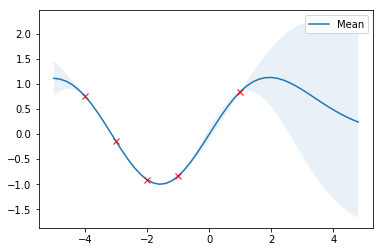

In [90]:
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)